# Insurance History EDA


In [3]:
#auto loading
%load_ext autoreload
%autoreload 2

## 🧱 1. Setup & Imports

In [4]:
import warnings
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
from preprocessing.data_quality_utils import DataQualityUtils 
from utils.load_data import load_local_data
from utils.helpers import DataInspectionUtils
from preprocessing.eda import EDAUtils,MultivariateAnalysis

In [5]:
# Automatically go to project root (where .git or README.md is)
project_root = Path.cwd()
while not (project_root / "README.md").exists() and project_root != project_root.parent:
    project_root = project_root.parent

os.chdir(project_root)
print("Project root set to:", project_root)


Project root set to: /home/teshager/Documents/10Academy/repositories/projects/insurance-risk-modeling


In [6]:
#suppress warning errors
warnings.filterwarnings("ignore")
#load environment variables
load_dotenv()

True

### 📌 Project Overview

## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [7]:
# Load the insurance data
raw_data_dir= os.getenv("RAW_DATA")
processed_data_dir=os.getenv("PROCESSED_DATA")
df=pd.read_csv(raw_data_dir,delimiter = '|')
df.head()

UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscreen    Windscreen   
1  Current account  ...             Mobility - Windscreen    Windscreen   
2  Current account  ...             Mobility - Windscreen    Windscreen   
3  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   
4  Current account  ...  Mobility - Metered Taxis - R2000    Own damage   

    CoverType            CoverGroup              Section  \
0  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
1  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
2  Windscreen  Comprehensive - Taxi  Motor Comprehensive   
3  Own Damage  Comprehensive - Taxi  Motor Comprehensive   
4  Own Damage  Comprehensive - Taxi  Motor Comprehensive   

                           Product StatutoryClass StatutoryRiskType  \
0  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
1  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
2  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
3  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
4  Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   

   TotalPremium TotalClaims  
0     21.929825         0.0  
1     21.929825         0.0  
2      0.000000         0.0  
3    512.848070         0.0  
4      0.000000         0.0  

[5 rows x 52 columns]

### Dataset Overview

In [8]:
#view sample data
df.sample(5)

UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
982199                86891      7470  2015-08-01 00:00:00            False   
385993                53947      5026  2015-03-01 00:00:00            False   
266445               210064     17370  2015-04-01 00:00:00            False   
743188                 2005       217  2015-04-01 00:00:00            False   
633906                84937      7300  2015-04-01 00:00:00            False   

       Citizenship   LegalType Title Language                 Bank  \
982199          ZA  Individual    Mr  English        Standard Bank   
385993              Individual    Mr  English  First National Bank   
266445              Individual    Mr  English  First National Bank   
743188              Individual   Mrs  English            ABSA Bank   
633906              Individual    Mr  English        Standard Bank   

            AccountType  ...  \
982199  Savings account  ...   
385993  Savings account  ...   
266445  Current account  ...   
743188  Current account  ...   
633906  Current account  ...   

                                           ExcessSelected      CoverCategory  \
982199  Mobility - Taxi with value less than R100 000 ...        Own Damage.   
385993                                          No excess        Third Party   
266445  Mobility - Taxi with value less than R100 000 ...        Own Damage.   
743188                                          No excess  Emergency Charges   
633906  Mobility - Taxi with value more than R100 000 ...        Own Damage    

                CoverType            CoverGroup              Section  \
982199         Own Damage  Comprehensive - Taxi  Motor Comprehensive   
385993        Third Party  Comprehensive - Taxi  Motor Comprehensive   
266445         Own Damage  Comprehensive - Taxi  Motor Comprehensive   
743188  Emergency Charges  Comprehensive - Taxi  Motor Comprehensive   
633906         Own Damage  Comprehensive - Taxi  Motor Comprehensive   

                                   Product StatutoryClass StatutoryRiskType  \
982199  Mobility Commercial Cover: Monthly     Commercial     IFRS Constant   
385993  Mobility Commercial Cover: Monthly     Commercial     IFRS Constant   
266445  Mobility Commercial Cover: Monthly     Commercial     IFRS Constant   
743188     Mobility Metered Taxis: Monthly     Commercial     IFRS Constant   
633906  Mobility Commercial Cover: Monthly     Commercial     IFRS Constant   

        TotalPremium TotalClaims  
982199      0.000000         0.0  
385993    170.736404         0.0  
266445    466.544561         0.0  
743188      4.250263         0.0  
633906    573.067895         0.0  

[5 rows x 52 columns]

In [9]:
#see the last rows
df.tail()

UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:00            False   

        Citizenship   LegalType Title Language       Bank      AccountType  \
1000093          ZW  Individual    Mr  English  ABSA Bank  Savings account   
1000094          ZW  Individual    Mr  English  ABSA Bank  Savings account   
1000095          ZW  Individual    Mr  English  ABSA Bank  Savings account   
1000096          ZW  Individual    Mr  English  ABSA Bank  Savings account   
1000097          ZW  Individual    Mr  English  ABSA Bank  Savings account   

         ... ExcessSelected        CoverCategory            CoverType  \
1000093  ...      No excess          Third Party          Third Party   
1000094  ...      No excess          Third Party          Third Party   
1000095  ...      No excess          Third Party          Third Party   
1000096  ...      No excess  Passenger Liability  Passenger Liability   
1000097  ...      No excess  Passenger Liability  Passenger Liability   

                   CoverGroup              Section  \
1000093  Comprehensive - Taxi  Motor Comprehensive   
1000094  Comprehensive - Taxi  Motor Comprehensive   
1000095  Comprehensive - Taxi  Motor Comprehensive   
1000096  Comprehensive - Taxi  Motor Comprehensive   
1000097  Comprehensive - Taxi  Motor Comprehensive   

                                    Product StatutoryClass StatutoryRiskType  \
1000093  Mobility Commercial Cover: Monthly     Commercial     IFRS Constant   
1000094  Mobility Commercial Cover: Monthly     Commercial     IFRS Constant   
1000095  Mobility Commercial Cover: Monthly     Commercial     IFRS Constant   
1000096  Mobility Commercial Cover: Monthly     Commercial     IFRS Constant   
1000097  Mobility Commercial Cover: Monthly     Commercial     IFRS Constant   

         TotalPremium TotalClaims  
1000093    347.235175         0.0  
1000094    347.235175         0.0  
1000095    347.235175         0.0  
1000096      2.315000         0.0  
1000097      2.315000         0.0  

[5 rows x 52 columns]

In [10]:
#shape of the dataset
df.shape

(1000098, 52)

In [11]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [12]:
di=DataInspectionUtils()

### Look into distinct values from each column

In [13]:
#list out distinct values from each column
di.display_column_uniques(df)

[2025-06-17 16:45:38,782] INFO - Computing unique values for each column...
INFO:utils.helpers:Computing unique values for each column...


[2025-06-17 16:45:40,815] INFO - Unique values displayed successfully.
INFO:utils.helpers:Unique values displayed successfully.


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Columns that only have only one unique value offer no analytical / predictive value hence need to be removed
</div>

In [14]:
di.get_constant_columns(df)

[2025-06-17 16:45:40,847] INFO - Checking for columns with only one unique value...
INFO:utils.helpers:Checking for columns with only one unique value...
[2025-06-17 16:45:41,770] INFO - Found 6 constant columns.
INFO:utils.helpers:Found 6 constant columns.


## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [15]:
#Numerical Columns
df.describe().T

count          mean           std           min  \
UnderwrittenCoverID       1000098.0  1.048175e+05  6.329371e+04  1.000000e+00   
PolicyID                  1000098.0  7.956682e+03  5.290039e+03  1.400000e+01   
PostalCode                1000098.0  3.020601e+03  2.649854e+03  1.000000e+00   
mmcode                     999546.0  5.487770e+07  1.360381e+07  4.041200e+06   
RegistrationYear          1000098.0  2.010225e+03  3.261391e+00  1.987000e+03   
Cylinders                  999546.0  4.046642e+00  2.940201e-01  0.000000e+00   
cubiccapacity              999546.0  2.466743e+03  4.428006e+02  0.000000e+00   
kilowatts                  999546.0  9.720792e+01  1.939326e+01  0.000000e+00   
NumberOfDoors              999546.0  4.019250e+00  4.683144e-01  0.000000e+00   
CustomValueEstimate        220456.0  2.255311e+05  5.645157e+05  2.000000e+04   
NumberOfVehiclesInFleet         0.0           NaN           NaN           NaN   
SumInsured                1000098.0  6.041727e+05  1.508332e+06  1.000000e-02   
CalculatedPremiumPerTerm  1000098.0  1.178757e+02  3.997017e+02  0.000000e+00   
TotalPremium              1000098.0  6.190550e+01  2.302845e+02 -7.825768e+02   
TotalClaims               1000098.0  6.486119e+01  2.384075e+03 -1.200241e+04   

                                   25%           50%           75%  \
UnderwrittenCoverID       5.514300e+04  9.408300e+04  1.391900e+05   
PolicyID                  4.500000e+03  7.071000e+03  1.107700e+04   
PostalCode                8.270000e+02  2.000000e+03  4.180000e+03   
mmcode                    6.005692e+07  6.005842e+07  6.005842e+07   
RegistrationYear          2.008000e+03  2.011000e+03  2.013000e+03   
Cylinders                 4.000000e+00  4.000000e+00  4.000000e+00   
cubiccapacity             2.237000e+03  2.694000e+03  2.694000e+03   
kilowatts                 7.500000e+01  1.110000e+02  1.110000e+02   
NumberOfDoors             4.000000e+00  4.000000e+00  4.000000e+00   
CustomValueEstimate       1.350000e+05  2.200000e+05  2.800000e+05   
NumberOfVehiclesInFleet            NaN           NaN           NaN   
SumInsured                5.000000e+03  7.500000e+03  2.500000e+05   
CalculatedPremiumPerTerm  3.224800e+00  8.436900e+00  9.000000e+01   
TotalPremium              0.000000e+00  2.178333e+00  2.192982e+01   
TotalClaims               0.000000e+00  0.000000e+00  0.000000e+00   

                                   max  
UnderwrittenCoverID       3.011750e+05  
PolicyID                  2.324600e+04  
PostalCode                9.870000e+03  
mmcode                    6.506535e+07  
RegistrationYear          2.015000e+03  
Cylinders                 1.000000e+01  
cubiccapacity             1.288000e+04  
kilowatts                 3.090000e+02  
NumberOfDoors             6.000000e+00  
CustomValueEstimate       2.655000e+07  
NumberOfVehiclesInFleet            NaN  
SumInsured                1.263620e+07  
CalculatedPremiumPerTerm  7.442217e+04  
TotalPremium              6.528260e+04  
TotalClaims               3.930921e+05

In [16]:
#for columns of object type
df.describe(include=['O']).T

count unique                                 top  \
TransactionMonth    1000098     23                 2015-08-01 00:00:00   
Citizenship         1000098      4                                       
LegalType           1000098      6                          Individual   
Title               1000098      5                                  Mr   
Language            1000098      1                             English   
Bank                 854137     11                 First National Bank   
AccountType          959866      3                     Current account   
MaritalStatus        991839      3                       Not specified   
Gender               990562      3                       Not specified   
Country             1000098      1                        South Africa   
Province            1000098      9                             Gauteng   
MainCrestaZone      1000098     16     Transvaal (all except Pretoria)   
SubCrestaZone       1000098     45                        Johannesburg   
ItemType            1000098      1                    Mobility - Motor   
VehicleType          999546      5                   Passenger Vehicle   
make                 999546     46                              TOYOTA   
Model                999546    411           QUANTUM 2.7 SESFIKILE 16s   
bodytype             999546     13                                 B/S   
VehicleIntroDate     999546    174                              4/2012   
AlarmImmobiliser    1000098      2                                 Yes   
TrackingDevice      1000098      2                                  No   
CapitalOutstanding  1000096   1011                                   0   
NewVehicle           846803      2                  More than 6 months   
WrittenOff           358197      2                                  No   
Rebuilt              358197      2                                  No   
Converted            358197      2                                  No   
CrossBorder             698      1                                  No   
TermFrequency       1000098      2                             Monthly   
ExcessSelected      1000098     13                           No excess   
CoverCategory       1000098     28                 Passenger Liability   
CoverType           1000098     22                          Own Damage   
CoverGroup          1000098     14                Comprehensive - Taxi   
Section             1000098      5                 Motor Comprehensive   
Product             1000098      4  Mobility Commercial Cover: Monthly   
StatutoryClass      1000098      1                          Commercial   
StatutoryRiskType   1000098      1                       IFRS Constant   

                       freq  
TransactionMonth     106747  
Citizenship          895210  
LegalType            911929  
Title                933555  
Language            1000098  
Bank                 260811  
AccountType          597938  
MaritalStatus        986208  
Gender               940990  
Country             1000098  
Province             393865  
MainCrestaZone       296187  
SubCrestaZone        176020  
ItemType            1000098  
VehicleType          933598  
make                 813280  
Model                186087  
bodytype             844400  
VehicleIntroDate     287638  
AlarmImmobiliser     999861  
TrackingDevice       656617  
CapitalOutstanding   665918  
NewVehicle           845223  
WrittenOff           358165  
Rebuilt              358165  
Converted            358110  
CrossBorder             698  
TermFrequency        999554  
ExcessSelected       791235  
CoverCategory        104158  
CoverType            104183  
CoverGroup           824124  
Section              828125  
Product              915028  
StatutoryClass      1000098  
StatutoryRiskType   1000098

In [17]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [18]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

UnderwrittenCoverID         116532
TotalPremium                 38959
CalculatedPremiumPerTerm     19869
PolicyID                      7000
SumInsured                    2186
TotalClaims                   1615
CapitalOutstanding            1011
CustomValueEstimate            923
PostalCode                     888
mmcode                         427
Model                          411
VehicleIntroDate               174
cubiccapacity                  122
kilowatts                       82
make                            46
SubCrestaZone                   45
CoverCategory                   28
RegistrationYear                25
TransactionMonth                23
CoverType                       22
MainCrestaZone                  16
CoverGroup                      14
ExcessSelected                  13
bodytype                        13
Bank                            11
Province                         9
Cylinders                        7
LegalType                        6
NumberOfDoors       

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [19]:
df.columns.sort_values()

Index(['AccountType', 'AlarmImmobiliser', 'Bank', 'CalculatedPremiumPerTerm',
       'CapitalOutstanding', 'Citizenship', 'Converted', 'Country',
       'CoverCategory', 'CoverGroup', 'CoverType', 'CrossBorder',
       'CustomValueEstimate', 'Cylinders', 'ExcessSelected', 'Gender',
       'IsVATRegistered', 'ItemType', 'Language', 'LegalType',
       'MainCrestaZone', 'MaritalStatus', 'Model', 'NewVehicle',
       'NumberOfDoors', 'NumberOfVehiclesInFleet', 'PolicyID', 'PostalCode',
       'Product', 'Province', 'Rebuilt', 'RegistrationYear', 'Section',
       'StatutoryClass', 'StatutoryRiskType', 'SubCrestaZone', 'SumInsured',
       'TermFrequency', 'Title', 'TotalClaims', 'TotalPremium',
       'TrackingDevice', 'TransactionMonth', 'UnderwrittenCoverID',
       'VehicleIntroDate', 'VehicleType', 'WrittenOff', 'bodytype',
       'cubiccapacity', 'kilowatts', 'make', 'mmcode'],
      dtype='object')

In [20]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [21]:
#count of missing values per column
missing=dq.summary()
missing[missing['#missing_values']>0]    #only columns with missing values

#missing_values percentage
NumberOfVehiclesInFleet          1000098    100.00%
CrossBorder                       999400     99.93%
CustomValueEstimate               779642     77.96%
Rebuilt                           641901     64.18%
Converted                         641901     64.18%
WrittenOff                        641901     64.18%
NewVehicle                        153295     15.33%
Bank                              145961     14.59%
AccountType                        40232      4.02%
Gender                              9536      0.95%
MaritalStatus                       8259      0.83%
NumberOfDoors                        552      0.06%
VehicleType                          552      0.06%
kilowatts                            552      0.06%
cubiccapacity                        552      0.06%
Cylinders                            552      0.06%
Model                                552      0.06%
make                                 552      0.06%
VehicleIntroDate                     552      0.06%
bodytype                             552      0.06%
mmcode                               552      0.06%
CapitalOutstanding                     2      0.00%

### Missing Values

In [22]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

#missing_values percentage
NumberOfVehiclesInFleet          1000098    100.00%
CrossBorder                       999400     99.93%
CustomValueEstimate               779642     77.96%
WrittenOff                        641901     64.18%
Rebuilt                           641901     64.18%
Converted                         641901     64.18%
NewVehicle                        153295     15.33%
Bank                              145961     14.59%

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* NumberOfVehiclesinFleet has 100% missing values hence can be safely removed, the others need closer investigation since there is a possibility they are left open because
  <br>they are presumed obvious.
</div>

#### Cross Border

In [23]:
#what provinces have not explicitly as crossborder
df[df['CrossBorder']=='No']['Province'].unique()

array(['Gauteng'], dtype=object)

In [24]:
dft=df[df['CrossBorder'].isna()]
# sample through the gauteng province
dft[dft['Province']=='Gauteng'][['Province','CrossBorder']].sample(5)

Province CrossBorder
162057  Gauteng         NaN
668577  Gauteng         NaN
103232  Gauteng         NaN
138010  Gauteng         NaN
331832  Gauteng         NaN

In [25]:
# Create two groups
crossborder_nan = df[df['CrossBorder'].isna()]
crossborder_no = df[df['CrossBorder'] == 'No']

In [26]:
# Example 1: Average distance or province
crossborder_nan['Province'].value_counts(normalize=True)
crossborder_no['Province'].value_counts(normalize=True)

# Example 2: SumInsured or claims
crossborder_nan[['SumInsured', 'TotalClaims']].describe()


SumInsured    TotalClaims
count  9.994000e+05  999400.000000
mean   6.042034e+05      64.906490
std    1.508435e+06    2384.906475
min    1.000000e-02  -12002.412281
25%    5.000000e+03       0.000000
50%    7.500000e+03       0.000000
75%    2.500000e+05       0.000000
max    1.263620e+07  393092.105263

In [27]:
crossborder_no[['SumInsured', 'TotalClaims']].describe()

SumInsured  TotalClaims
count  6.980000e+02        698.0
mean   5.601977e+05          0.0
std    1.353423e+06          0.0
min    1.000000e-02          0.0
25%    5.000000e+03          0.0
50%    7.500000e+03          0.0
75%    5.000000e+05          0.0
max    5.000000e+06          0.0

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* There are no claims from those that had No for Cross border
</div>

In [28]:
# Check province distribution for NaN in CrossBorder
nan_crossborder = df[df['CrossBorder'].isna()]
border_provinces = ['Limpopo', 'Mpumalanga', 'North West', 'Free State', 'KwaZulu-Natal', 'Northern Cape']

# Count how many NaNs are in each province
province_counts = nan_crossborder['Province'].value_counts()

# Are they mainly from border provinces?
border_nan_counts = province_counts.loc[province_counts.index.isin(border_provinces)]
nonborder_nan_counts = province_counts.loc[~province_counts.index.isin(border_provinces)]

print("NaN CrossBorder from border provinces:\n", border_nan_counts)
print("\nNaN CrossBorder from non-border provinces:\n", nonborder_nan_counts)

# Compare financials
print("\nStats for NaN CrossBorder:")
print(nan_crossborder[['SumInsured', 'TotalClaims']].describe())


NaN CrossBorder from border provinces:
 Province
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64

NaN CrossBorder from non-border provinces:
 Province
Gauteng         393167
Western Cape    170796
Eastern Cape     30336
Name: count, dtype: int64

Stats for NaN CrossBorder:
         SumInsured    TotalClaims
count  9.994000e+05  999400.000000
mean   6.042034e+05      64.906490
std    1.508435e+06    2384.906475
min    1.000000e-02  -12002.412281
25%    5.000000e+03       0.000000
50%    7.500000e+03       0.000000
75%    2.500000e+05       0.000000
max    1.263620e+07  393092.105263


### Duplicates

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* NumberOfVehiclesinFleet has 100% missing values hence can be safely removed, the others need closer investigation since there is a possibility they are left open because
  <br>they are presumed obvious.
</div>

In [29]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [30]:
dq.find_invalid_values()

{'Citizenship': {'count': 895210,
  'examples': 0      
  1      
  2      
  3      
  4      
  Name: Citizenship, dtype: object}}

In [31]:
df['Citizenship'].value_counts()

Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [32]:
df.columns.sort_values()

Index(['AccountType', 'AlarmImmobiliser', 'Bank', 'CalculatedPremiumPerTerm',
       'CapitalOutstanding', 'Citizenship', 'Converted', 'Country',
       'CoverCategory', 'CoverGroup', 'CoverType', 'CrossBorder',
       'CustomValueEstimate', 'Cylinders', 'ExcessSelected', 'Gender',
       'IsVATRegistered', 'ItemType', 'Language', 'LegalType',
       'MainCrestaZone', 'MaritalStatus', 'Model', 'NewVehicle',
       'NumberOfDoors', 'NumberOfVehiclesInFleet', 'PolicyID', 'PostalCode',
       'Product', 'Province', 'Rebuilt', 'RegistrationYear', 'Section',
       'StatutoryClass', 'StatutoryRiskType', 'SubCrestaZone', 'SumInsured',
       'TermFrequency', 'Title', 'TotalClaims', 'TotalPremium',
       'TrackingDevice', 'TransactionMonth', 'UnderwrittenCoverID',
       'VehicleIntroDate', 'VehicleType', 'WrittenOff', 'bodytype',
       'cubiccapacity', 'kilowatts', 'make', 'mmcode'],
      dtype='object')

In [33]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [34]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [35]:
df=dq.convert_columns_to_datetime()

[INFO] [VehicleIntroDate] Converted: 999546/999546 (0 became NaT)
INFO:preprocessing.data_quality_utils:[VehicleIntroDate] Converted: 999546/999546 (0 became NaT)


In [36]:
df['VehicleIntroDate'].dtype

datetime64[ns, UTC]

#### Convert binary columns into boolean

In [37]:
# list binary columns
unique_counts=df.nunique()
binaries=unique_counts[df.nunique()==2]
binary_index=binaries.index.to_list()
binary_index =[x for x in binary_index if x not in ["NewVehicle","TermFrequency","IsVATRegistered"]]
binary_index

['AlarmImmobiliser', 'TrackingDevice', 'WrittenOff', 'Rebuilt', 'Converted']

In [38]:
#convert binary columns into boolean
for col in binary_index:
    df=dq.impute_value_in_column(df,col,'Yes',True)
    df=dq.impute_value_in_column(df,col,'No',False)

In [39]:

for col in binary_index:
    print(df[col].unique())

[ True False]
[False  True]
[nan False True]
[nan False True]
[nan False True]


In [40]:
#type inconsistencies
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce',)

### Constant Columns

In [41]:
print(f'before: {len(df)}')  # initial number of columns
#drop constant columns with only one distinct value
df=dq.drop_constant_columns(df)
print(f'after: {len(df)}')  #check if columns are dropped

[WARNING] [drop_constant_columns] Expected boolean for 'verbose', got <class 'pandas.core.frame.DataFrame'>. Defaulting to True.


before: 1000098


[INFO] Dropped constant columns: ['Language', 'Country', 'ItemType', 'NumberOfVehiclesInFleet', 'StatutoryClass', 'StatutoryRiskType']
INFO:preprocessing.data_quality_utils:Dropped constant columns: ['Language', 'Country', 'ItemType', 'NumberOfVehiclesInFleet', 'StatutoryClass', 'StatutoryRiskType']


after: 1000098


In [42]:
df.columns.sort_values()

Index(['AccountType', 'AlarmImmobiliser', 'Bank', 'CalculatedPremiumPerTerm',
       'CapitalOutstanding', 'Citizenship', 'Converted', 'CoverCategory',
       'CoverGroup', 'CoverType', 'CrossBorder', 'CustomValueEstimate',
       'Cylinders', 'ExcessSelected', 'Gender', 'IsVATRegistered', 'LegalType',
       'MainCrestaZone', 'MaritalStatus', 'Model', 'NewVehicle',
       'NumberOfDoors', 'PolicyID', 'PostalCode', 'Product', 'Province',
       'Rebuilt', 'RegistrationYear', 'Section', 'SubCrestaZone', 'SumInsured',
       'TermFrequency', 'Title', 'TotalClaims', 'TotalPremium',
       'TrackingDevice', 'TransactionMonth', 'UnderwrittenCoverID',
       'VehicleIntroDate', 'VehicleType', 'WrittenOff', 'bodytype',
       'cubiccapacity', 'kilowatts', 'make', 'mmcode'],
      dtype='object')

### Missing Values

In [43]:
print(f'before: {len(df)}')
#552 rows missing all the critical values
dq.drop_rows_with_missing_values(df,columns=['make','NumberOfDoors','kilowatts','cubiccapacity','Cylinders','VehicleIntroDate','Model','bodytype','VehicleType','mmcode','CapitalOutstanding'],inplace=True)
print(f'after: {len(df)}')

before: 1000098
after: 999544


In [44]:
#drop the crossborder column >99% missing
print(f'before: {len(df.columns)}')
df=dq.drop_columns(df,['CrossBorder'])
print(f'after: {len(df.columns)}');

before: 46
after: 45


In [45]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Bank',
       'AccountType', 'MaritalStatus', 'Gender', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate',
       'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt',
       'Converted', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'TotalPremium', 'TotalClaims'],
      dtype='object')

#### Converted

In [46]:
df['Converted'].value_counts()

Converted
No     358108
Yes        87
Name: count, dtype: int64

In [47]:
missing_value=f"missing values in the converted column: {df['Converted'].isnull().sum()*100/ len(df)} %"
missing_value

'missing values in the converted column: 64.16415885643853 %'

### Citizenship

In [48]:
df['Citizenship'].value_counts()

Citizenship
      894656
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

In [49]:
df['Citizenship'].unique()

array(['  ', 'AF', 'ZA', 'ZW'], dtype=object)

✅ Likely Hypothesis

If 'ZA' stands for South African citizens explicitly, and most entries are ' ' (blank), it’s very plausible that the blanks represent South African citizens by default (i.e., default assumed value = ZA unless specified).

In [50]:
empty_cit=df[df['Citizenship'] !='  ']  # separate the the row that are not filled

In [51]:
empty_cit[empty_cit['IsVATRegistered']==True]    # check if these are VAT registered

Empty DataFrame
Columns: [UnderwrittenCoverID, PolicyID, TransactionMonth, IsVATRegistered, Citizenship, LegalType, Title, Bank, AccountType, MaritalStatus, Gender, Province, PostalCode, MainCrestaZone, SubCrestaZone, mmcode, VehicleType, RegistrationYear, make, Model, Cylinders, cubiccapacity, kilowatts, bodytype, NumberOfDoors, VehicleIntroDate, CustomValueEstimate, AlarmImmobiliser, TrackingDevice, CapitalOutstanding, NewVehicle, WrittenOff, Rebuilt, Converted, SumInsured, TermFrequency, CalculatedPremiumPerTerm, ExcessSelected, CoverCategory, CoverType, CoverGroup, Section, Product, TotalPremium, TotalClaims]
Index: []

[0 rows x 45 columns]

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* 🔍 Observation:

    All rows where Citizenship is blank (' ') have:  IsVATRegistered == False

🧠 Interpretation:

In South Africa, foreign individuals or entities are more likely to:

    Be VAT registered (e.g., if operating a business), Have their nationality explicitly recorded (e.g., ZW, AF).
</div>

### Gender

In [52]:
df[['Gender','Title']][df['Gender']=='Not specified'].value_counts()

Gender         Title
Not specified  Mr       880649
               Mrs       43489
               Ms         9014
               Miss       6474
               Dr          810
Name: count, dtype: int64

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Most of the Genders can be inferred from the Titles:
- Mr    =>  Male 
- Mrs,Ms,Miss   =>  Female
</div>

In [53]:
df=dq.infer_gender_from_title(gender_col='Gender',title_col="Title");

[LOG] Inferred gender for 939626 out of 940436 'Not specified' entries.


In [54]:
df[['Gender_Inferred','Title']].value_counts()

Gender_Inferred  Title
Male             Mr       933002
Female           Mrs       45849
                 Ms        13269
                 Miss       6614
Unknown          Dr          810
Name: count, dtype: int64

In [55]:
df=dq.infer_dr_gender_by_majority("Gender_Inferred","Title")

Most frequent known gender for Dr.: Unknown
Inferred 'Unknown' for 0 unspecified Dr. entries.


In [56]:
df[df['Title']=='Dr']['Gender'].value_counts()

Gender
Not specified    810
Name: count, dtype: int64

In [57]:
#impute the Not specififed gender with mode
df=dq.impute_value_in_column(df,"Gender_Inferred","Unknown","Male")
#drop the Gender Column
dq.drop_columns(df,['Gender'],inplace=True);

In [58]:
df['Gender_Inferred'].value_counts()

Gender_Inferred
Male      933812
Female     65732
Name: count, dtype: int64

### Rebuilt

In [59]:
df["Rebuilt"].value_counts()

Rebuilt
No     358163
Yes        32
Name: count, dtype: int64

In [60]:
#Customer Value Estimate
dq.drop_columns(df,columns_to_drop=['CustomValueEstimate'],inplace=True)

In [61]:
#The safest choice for the categorical columns is to impute the missing values with 'unknown'
dq.impute_missing_values(df,['CrossBorder','WrittenOff','Rebuilt','Converted','NewVehicle','Bank','AccountType','MaritalStatus'],'Unknown',True);
# dq.impute_missing_values(df,['CrossBorder','CustomValueEstimate','WrittenOff','Rebuilt','Converted','NewVehicle','Bank','AccountType','Gender','MaritalStatus'],'Unknown',True);
    

In [62]:
df.isna().sum().sort_values(ascending=False)

UnderwrittenCoverID         0
NumberOfDoors               0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
WrittenOff                  0
Rebuilt                     0
Converted                   0
CrossBorder                 0
SumInsured                  0
TermFrequency               0
CalculatedPremiumPerTerm    0
ExcessSelected              0
CoverCategory               0
CoverType                   0
CoverGroup                  0
Section                     0
Product                     0
TotalPremium                0
TotalClaims                 0
VehicleIntroDate            0
bodytype                    0
PolicyID                    0
kilowatts                   0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Bank                        0
AccountType                 0
MaritalStatus               0
Province  

In [63]:
numeric_cols=df.select_dtypes(include=['number']).columns.to_list()

In [64]:
numeric_cols

['UnderwrittenCoverID',
 'PolicyID',
 'PostalCode',
 'mmcode',
 'RegistrationYear',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'NumberOfDoors',
 'SumInsured',
 'CalculatedPremiumPerTerm',
 'TotalPremium',
 'TotalClaims']

###  Outlier Detection

In [65]:
dq.detect_outliers_iqr(df,numeric_cols)

{'UnderwrittenCoverID':         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
 1040                 277823     13608  2015-08-01 00:00:00            False   
 1042                 277820     13608  2015-08-01 00:00:00            False   
 2523                 277829     13608  2015-08-01 00:00:00            False   
 2524                 277824     13608  2015-08-01 00:00:00            False   
 3256                 277822     13608  2015-08-01 00:00:00            False   
 ...                     ...       ...                  ...              ...   
 997814               278936     22870  2015-08-01 00:00:00            False   
 997945               300164     23103  2015-08-01 00:00:00            False   
 997946               300174     23103  2015-08-01 00:00:00            False   
 999812               266687     20611  2015-08-01 00:00:00            False   
 999813               266688     20611  2015-07-01 00:00:00            False   
 
        Citizen

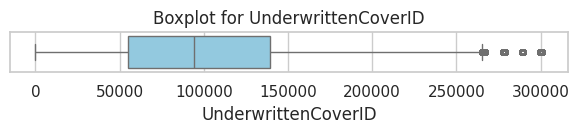

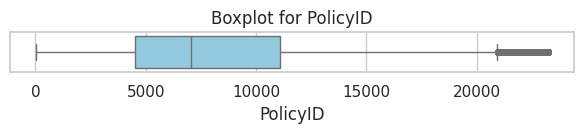

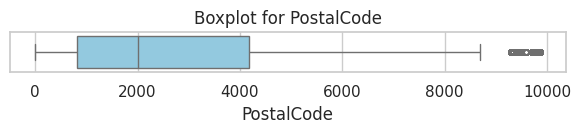

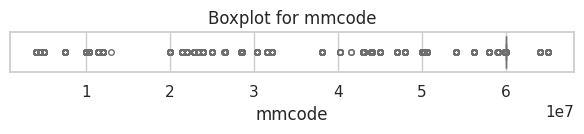

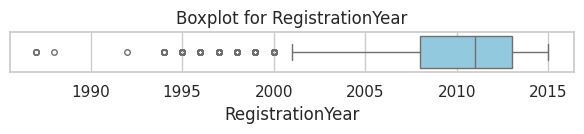

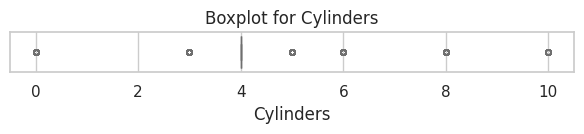

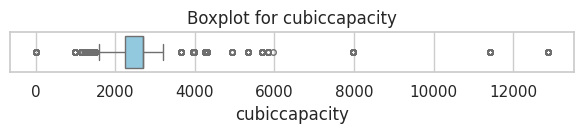

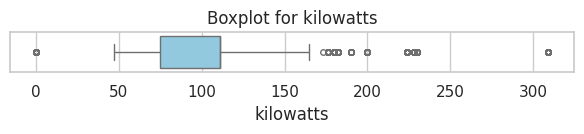

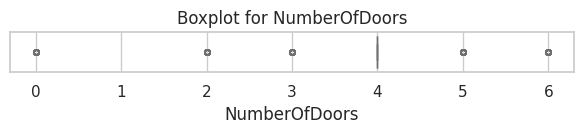

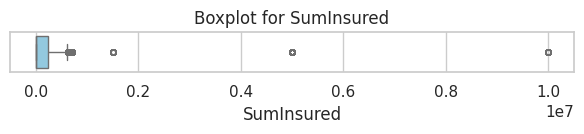

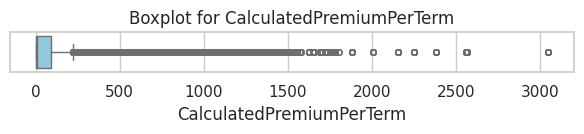

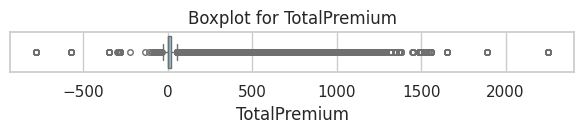

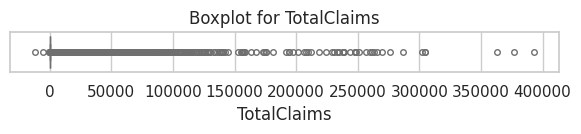

{'UnderwrittenCoverID':         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
 1040                 277823     13608  2015-08-01 00:00:00            False   
 1042                 277820     13608  2015-08-01 00:00:00            False   
 2523                 277829     13608  2015-08-01 00:00:00            False   
 2524                 277824     13608  2015-08-01 00:00:00            False   
 3256                 277822     13608  2015-08-01 00:00:00            False   
 ...                     ...       ...                  ...              ...   
 997814               278936     22870  2015-08-01 00:00:00            False   
 997945               300164     23103  2015-08-01 00:00:00            False   
 997946               300174     23103  2015-08-01 00:00:00            False   
 999812               266687     20611  2015-08-01 00:00:00            False   
 999813               266688     20611  2015-07-01 00:00:00            False   
 
        Citizen

In [66]:
dq.detect_outliers_iqr_with_boxplot(df,numeric_cols)

In [67]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Bank',
       'AccountType', 'MaritalStatus', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'TotalPremium', 'TotalClaims', 'Gender_Inferred'],
      dtype='object')

#### Remove Outliers

In [68]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
exclude_cols = ['TotalClaims'] 
filtered_cols = [col for col in numeric_cols if col not in exclude_cols]
# df=dq.remove_outliers_iqr(df, columns=filtered_cols)
df=dq.cap_outliers_iqr(df,columns=filtered_cols)

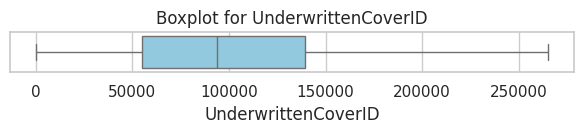

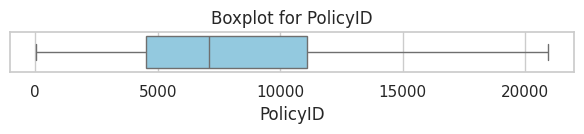

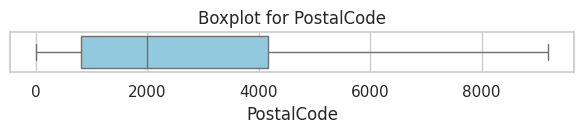

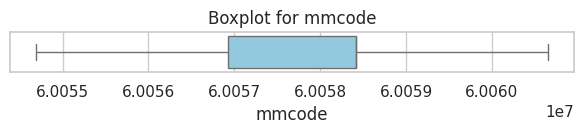

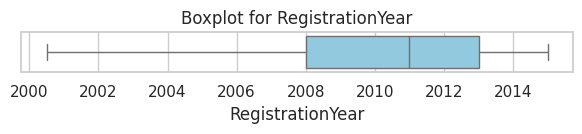

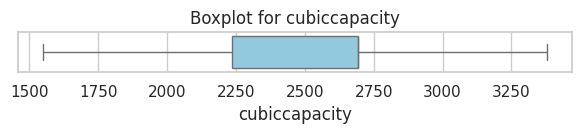

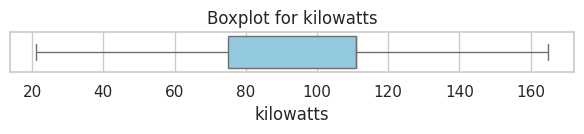

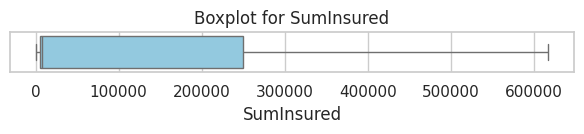

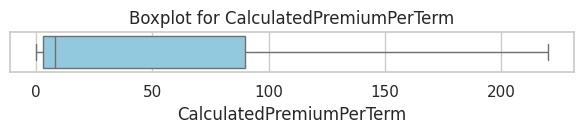

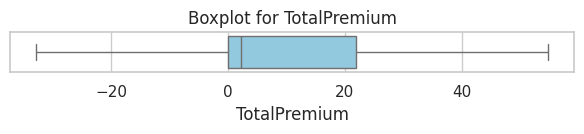

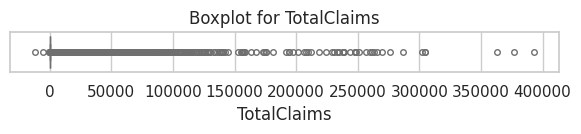

{'TotalClaims':         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
 203                   46222    4044.0  2014-10-01 00:00:00            False   
 284                   82062    7174.0  2015-03-01 00:00:00             True   
 1560                 119591    8672.0  2015-04-01 00:00:00            False   
 1779                  50193     283.0  2014-10-01 00:00:00            False   
 1943                 119582    8672.0  2015-04-01 00:00:00            False   
 ...                     ...       ...                  ...              ...   
 998512               263942     962.0  2015-07-01 00:00:00            False   
 998848                  937     138.0  2014-08-01 00:00:00            False   
 999218                 3255     394.0  2014-05-01 00:00:00            False   
 999701               238713   20611.0  2015-07-01 00:00:00            False   
 999923                15310     361.0  2014-06-01 00:00:00            False   
 
        Citizenship    

In [69]:
dq.detect_outliers_iqr_with_boxplot(df,numeric_cols)

In [70]:
df['Gender_Inferred'].value_counts()

Gender_Inferred
Male      933812
Female     65732
Name: count, dtype: int64

In [71]:
#type inconsistencies
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce',)

In [72]:
df=dq.create_combined_features(df)

In [72]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Bank',
       'AccountType', 'MaritalStatus', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'TotalPremium', 'TotalClaims', 'Gender_Inferred',
       'make_model', 'province_postal', 'cresta_zone_full', 'cover_package',
       'vehicle_class', 'vehicle_fin_status', 'vehicle_age_years',
       'vehicle_age_from_reg', 'premium_to_sum_ratio',
       'claims_to_premium_ratio'],
   

In [73]:
# Save to csv
file_path = os.path.join(processed_data_dir, 'cleaned_insurance_data.parquet')
# df.to_csv(file_path, index=False)
df.to_parquet(file_path, compression='snappy')

In [73]:
df.isnull().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Bank                             0
AccountType                      0
MaritalStatus                    0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                         0
NumberOfDoors                    0
VehicleIntroDate                 0
AlarmImmobiliser                 0
TrackingDevice                   0
CapitalOutstanding             320
NewVehicle          

# Univariate Analysis

In [113]:
#numberic columns
df_numeric=df.select_dtypes(include=['number'])
df_numeric.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CapitalOutstanding', 'SumInsured',
       'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'],
      dtype='object')

In [114]:
#bolean columns
df_bool=df.select_dtypes(include=['bool'])
df_bool.columns

Index(['IsVATRegistered'], dtype='object')

In [115]:
#date columns
df_date=df.select_dtypes(include=['datetime'])
df_date.columns

Index([], dtype='object')

In [116]:
df_cat=df.select_dtypes(include=['object'])
df_cat.columns

Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Bank',
       'AccountType', 'MaritalStatus', 'Province', 'MainCrestaZone',
       'SubCrestaZone', 'VehicleType', 'make', 'Model', 'bodytype',
       'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'Gender_Inferred'],
      dtype='object')

In [117]:
eda=EDAUtils(df)

[2025-06-17 09:21:47,286] INFO - Starting univariate analysis...
INFO:preprocessing.eda:Starting univariate analysis...


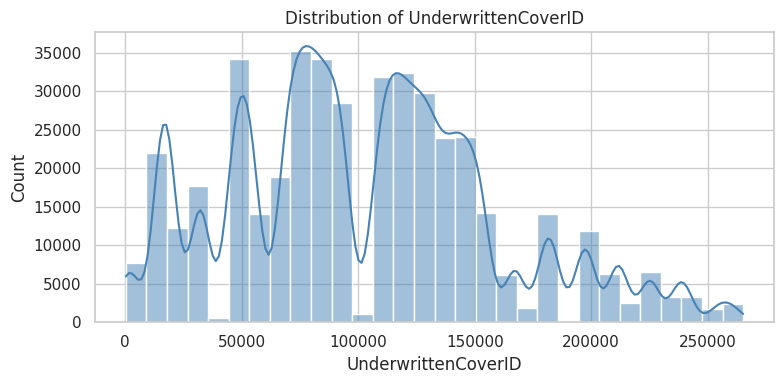

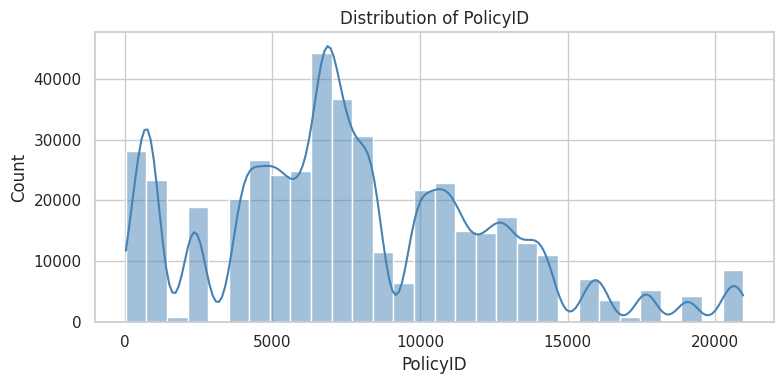

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


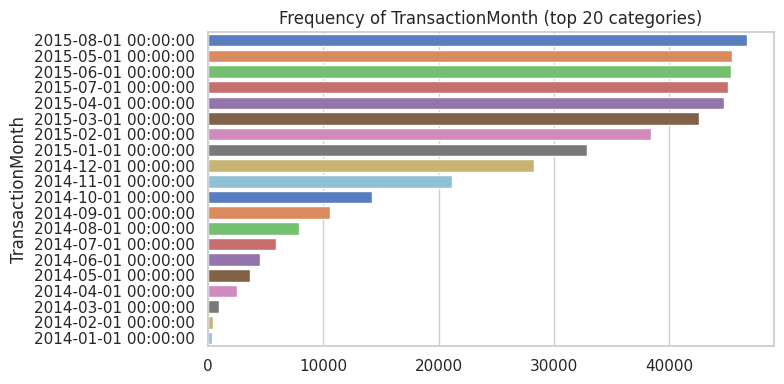

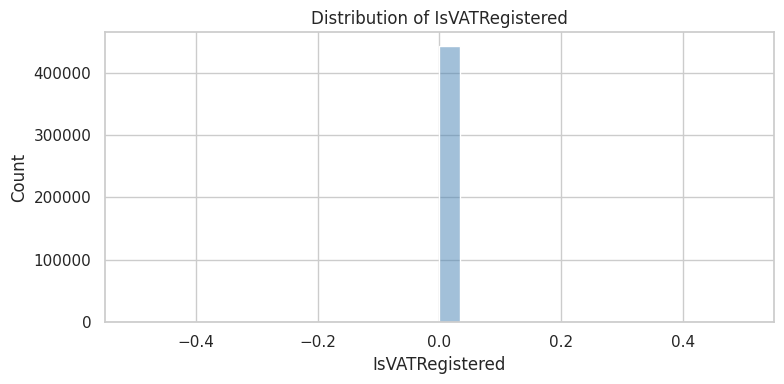

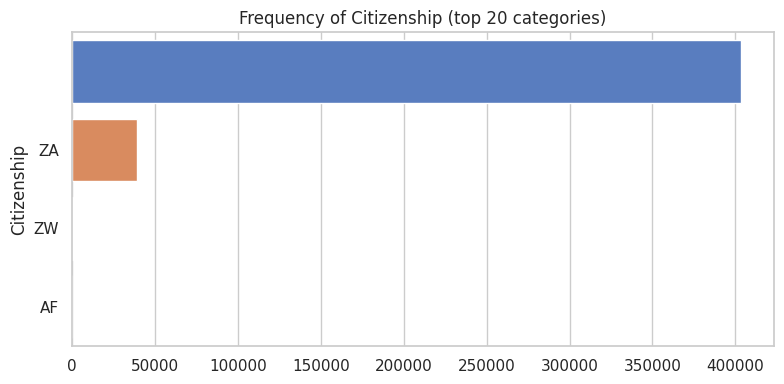

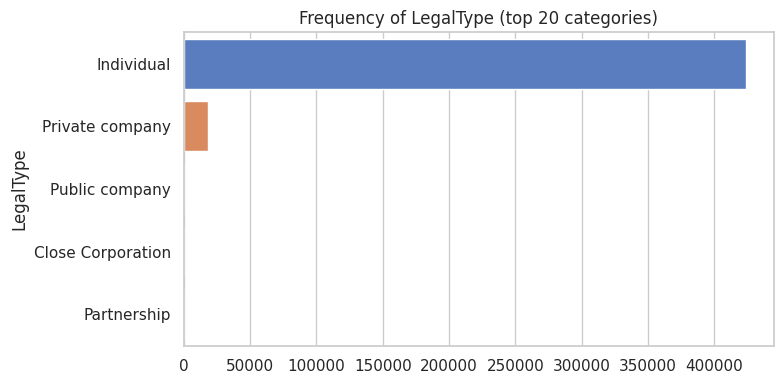

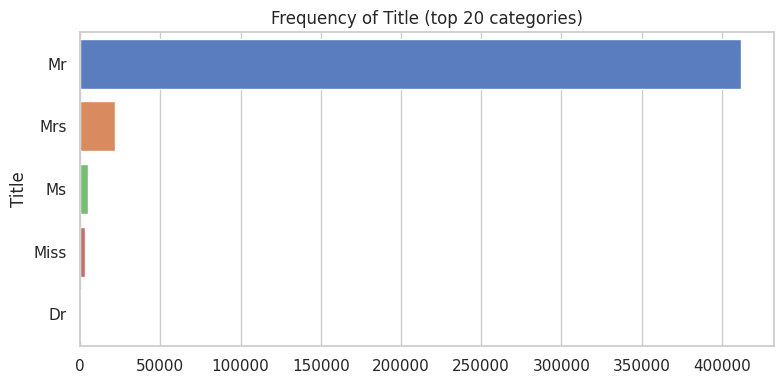

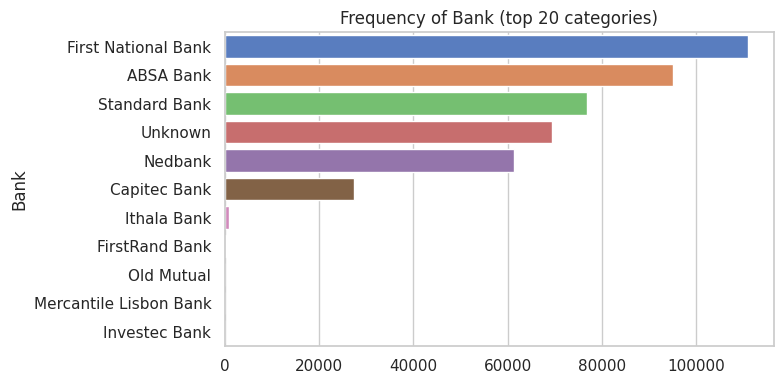

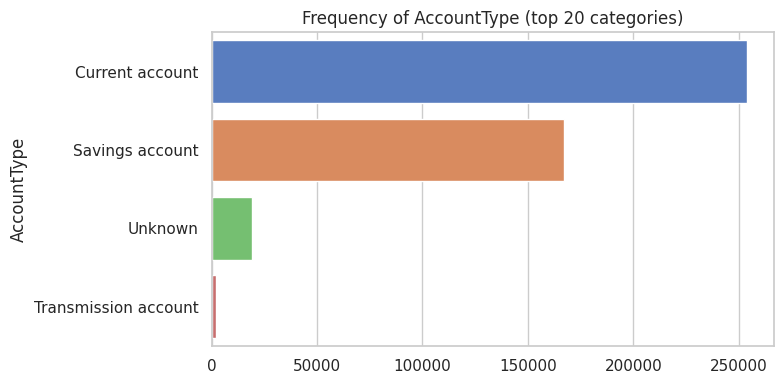

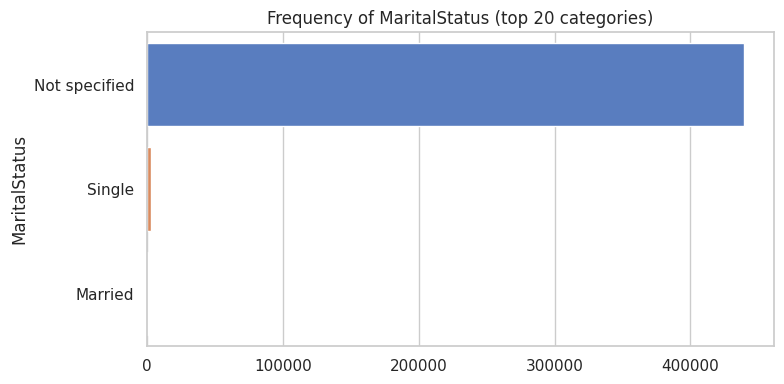

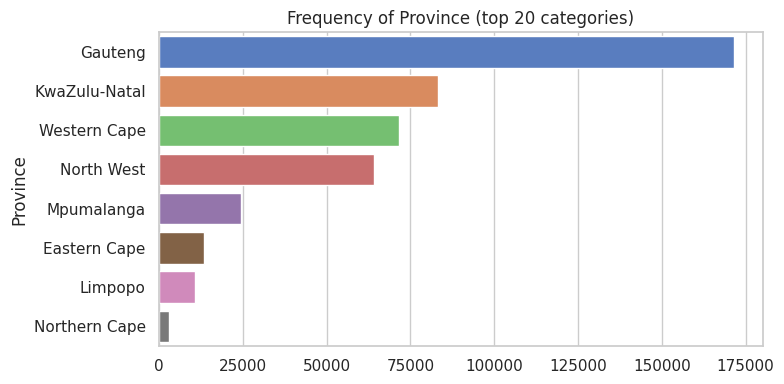

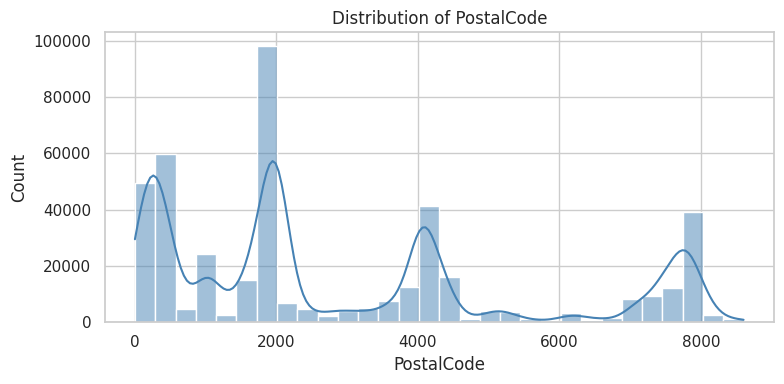

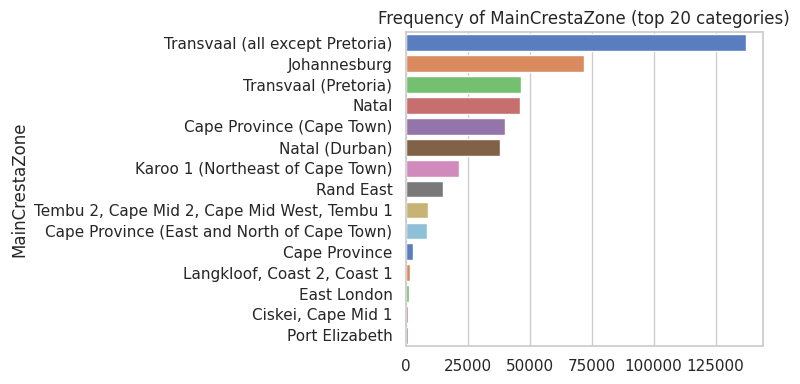

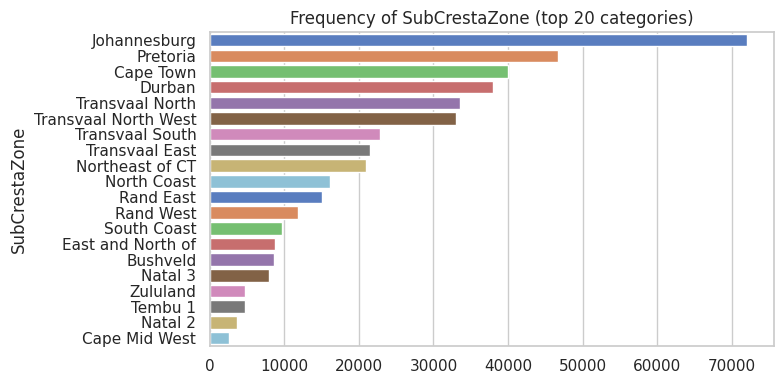

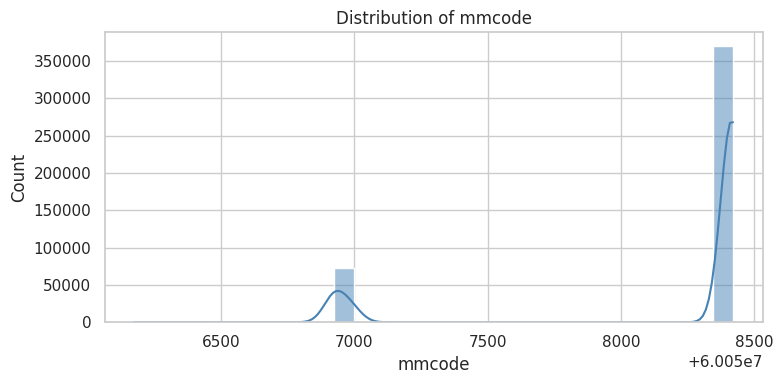

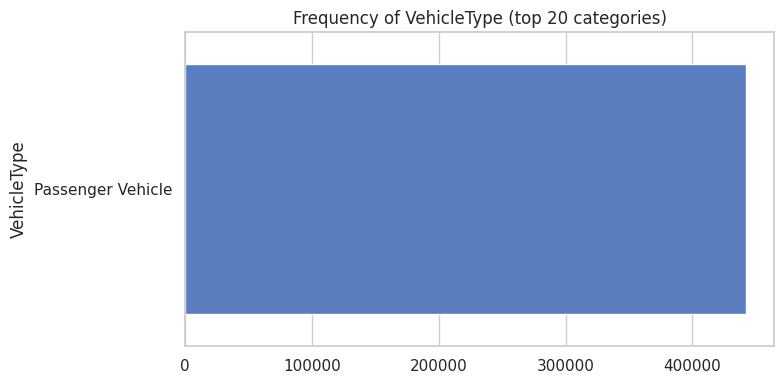

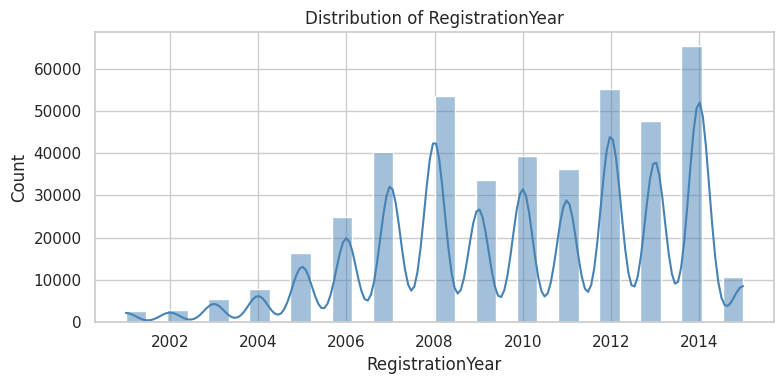

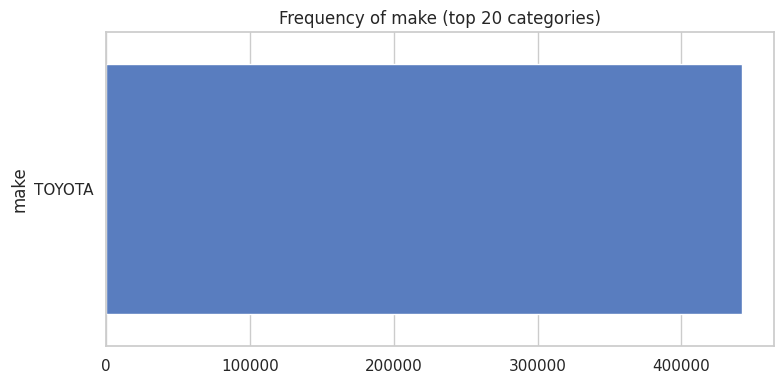

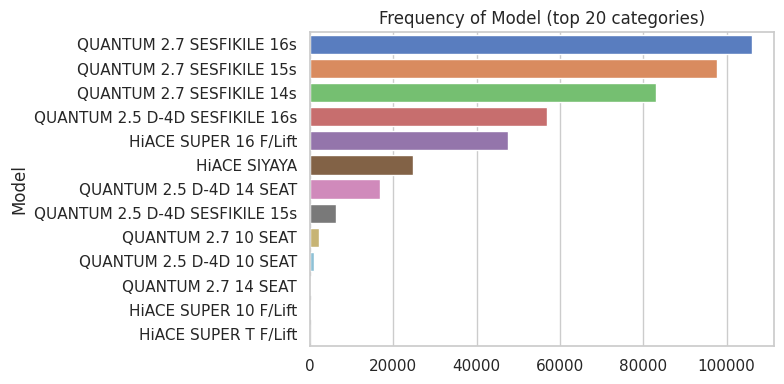

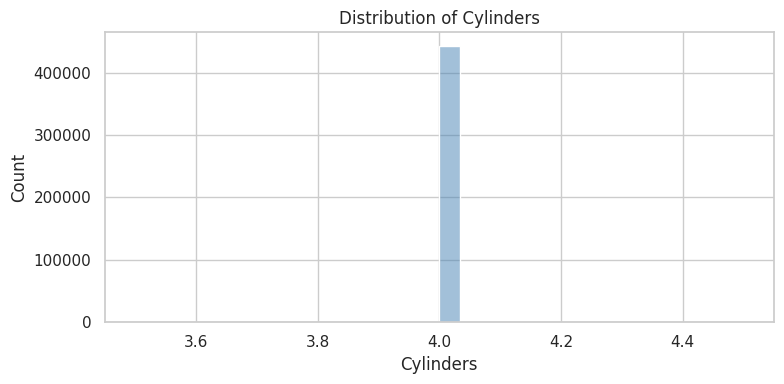

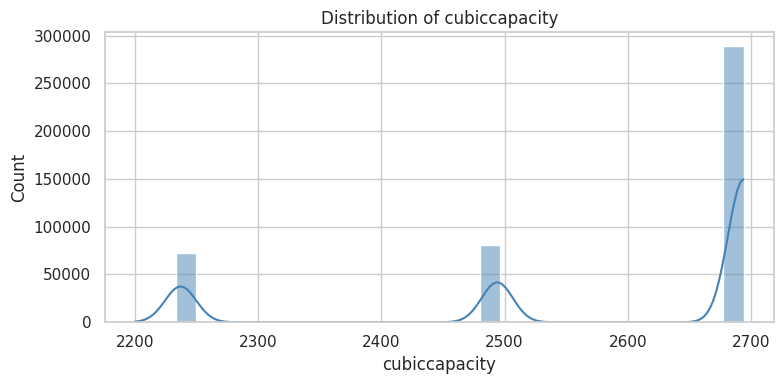

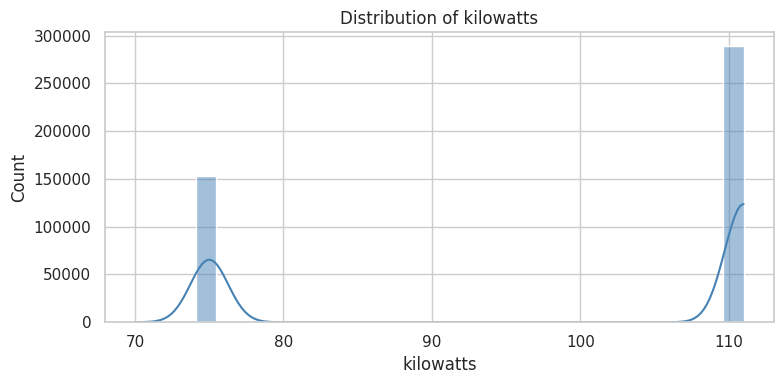

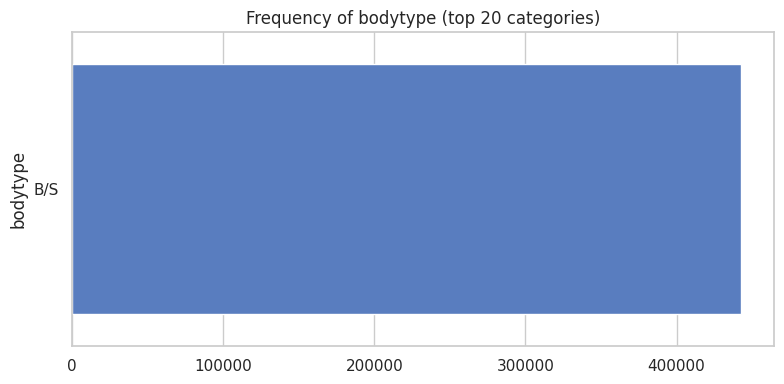

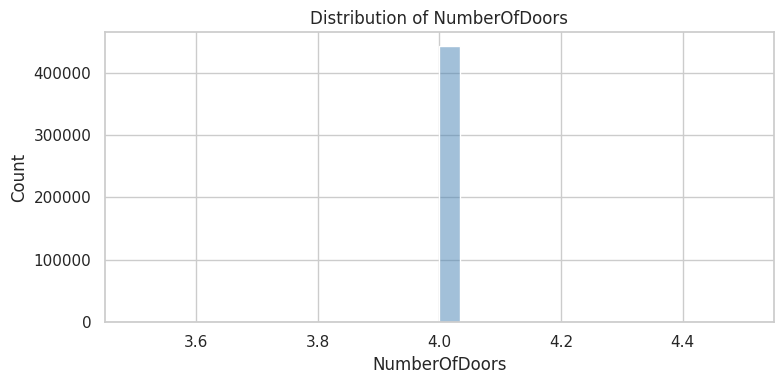

[2025-06-17 09:21:58,172] WARNING - Skipping unsupported column type: VehicleIntroDate


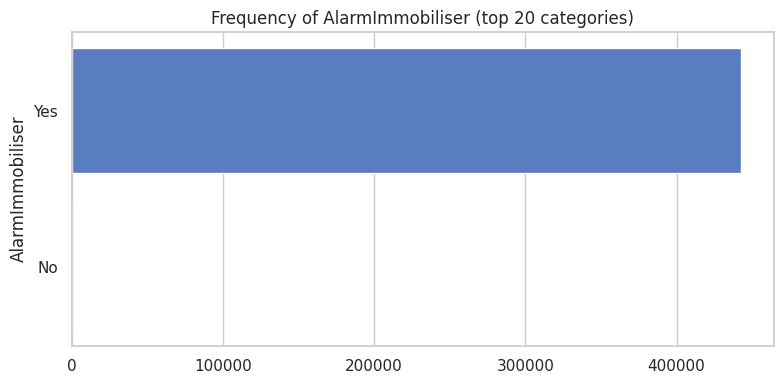

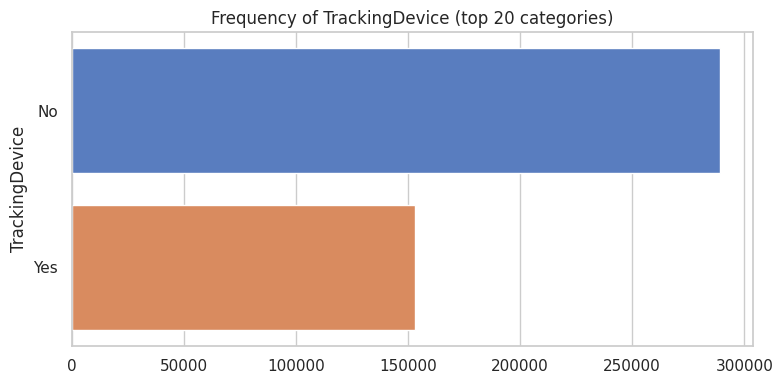

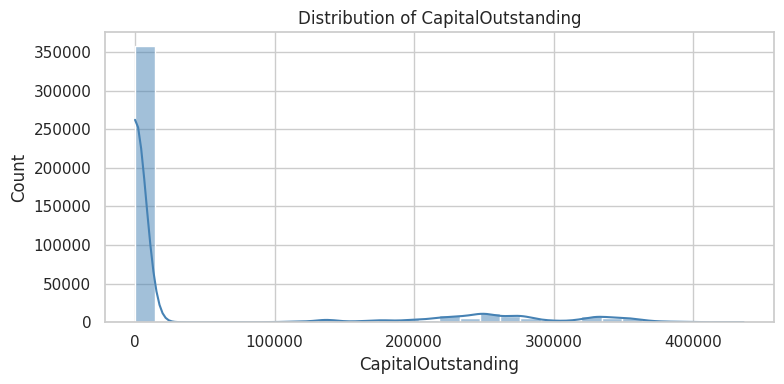

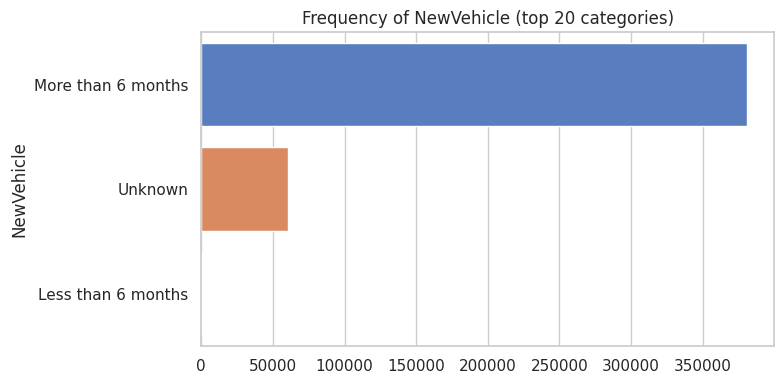

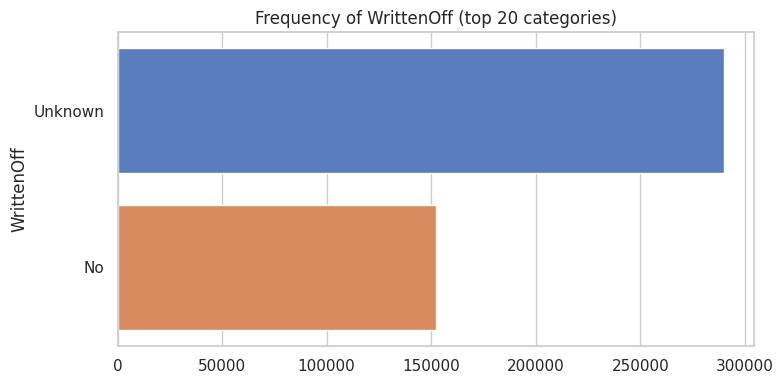

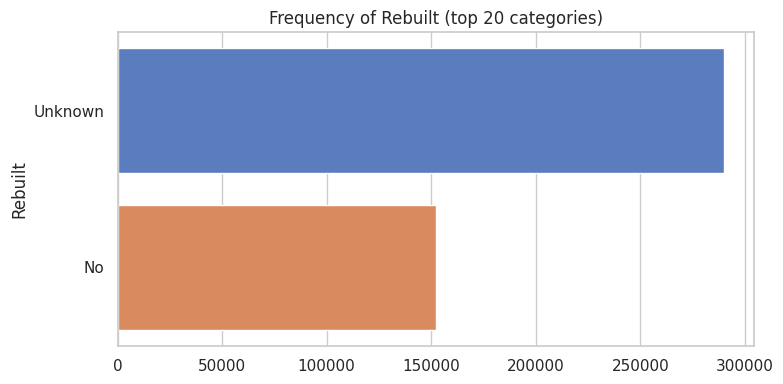

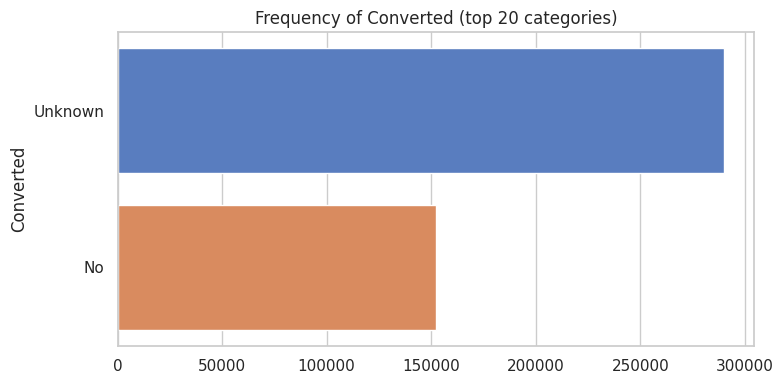

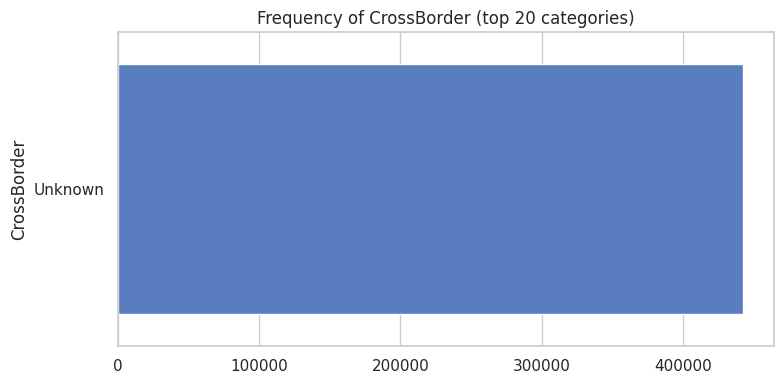

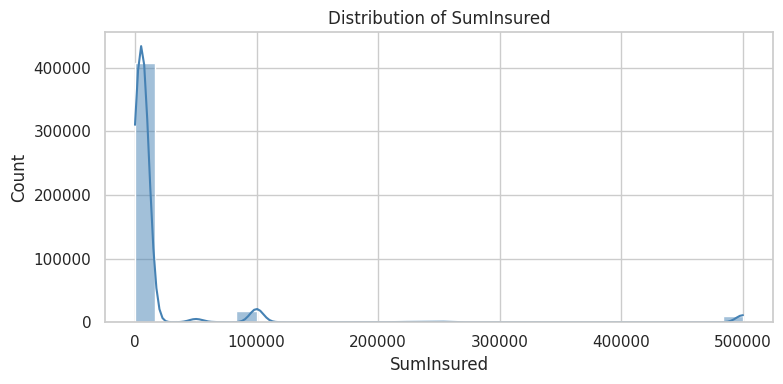

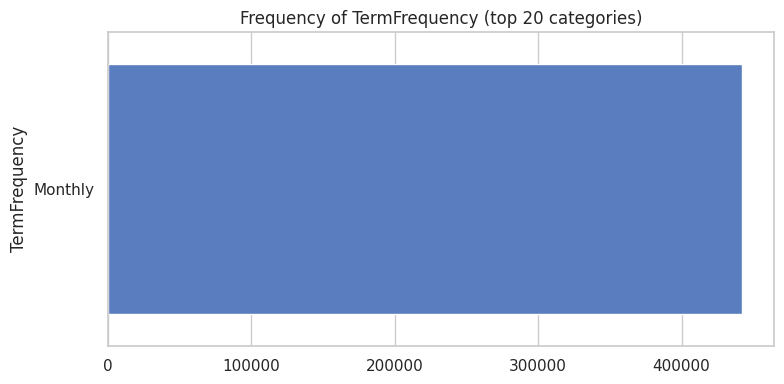

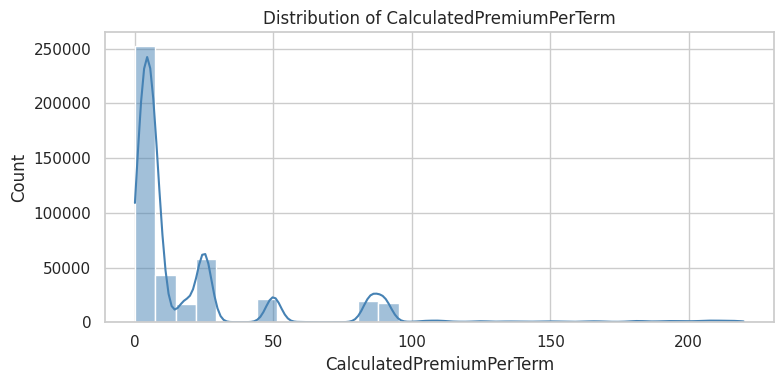

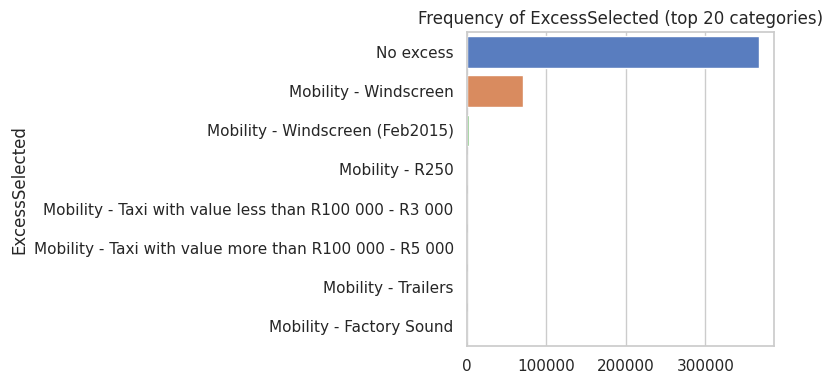

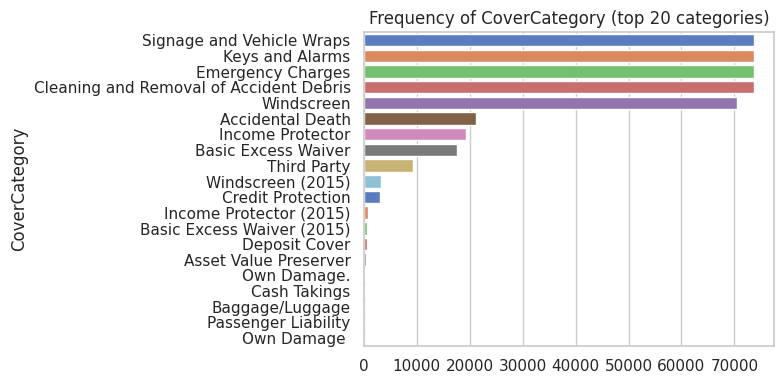

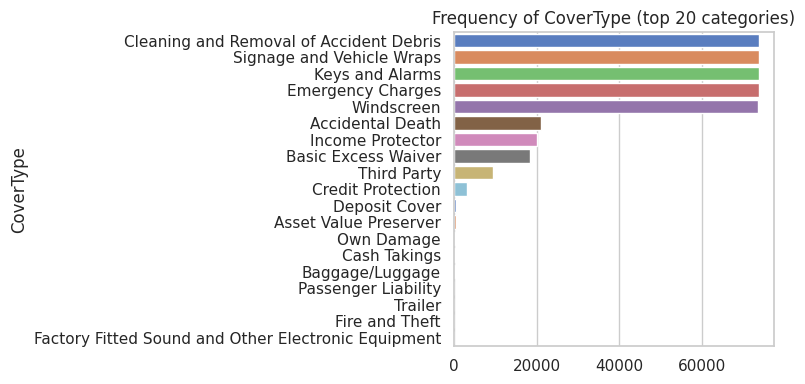

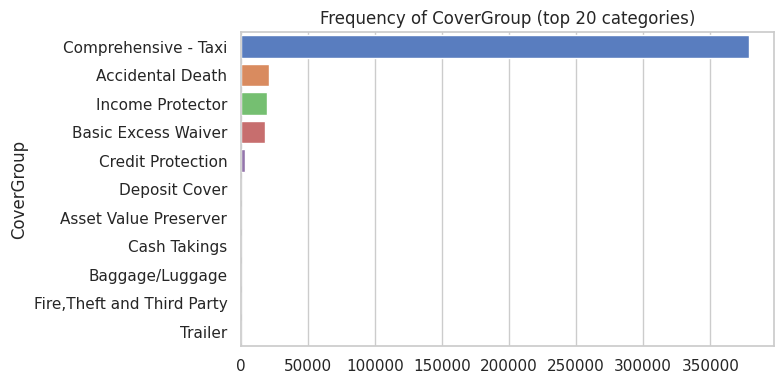

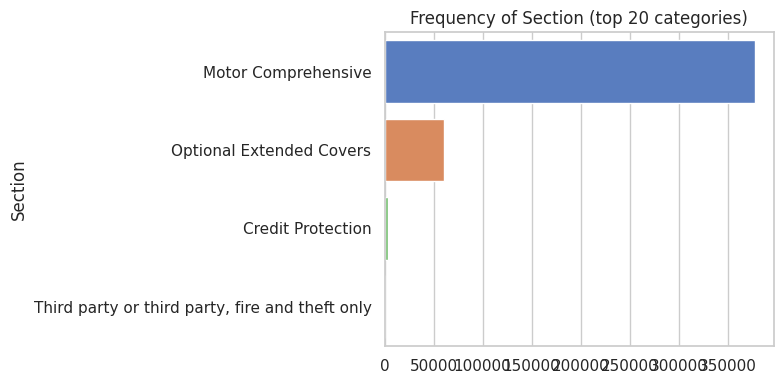

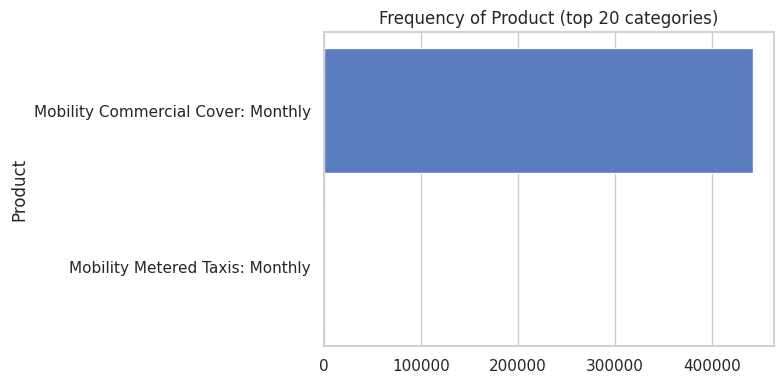

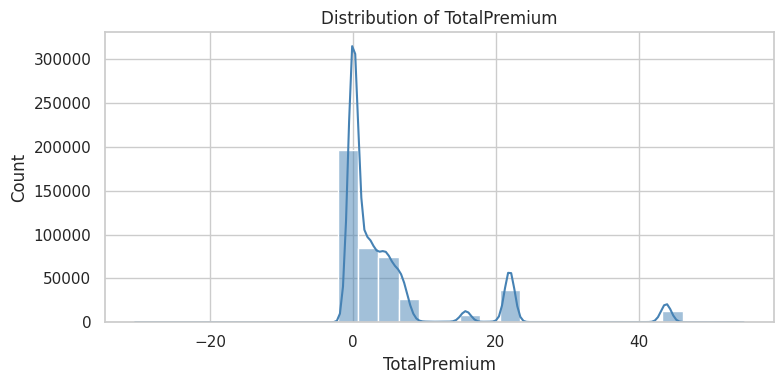

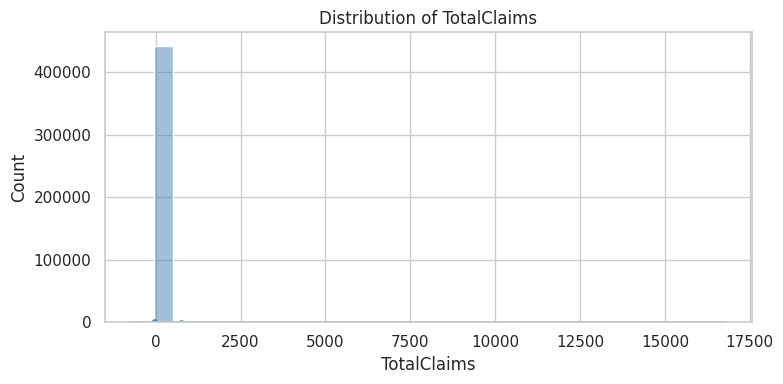

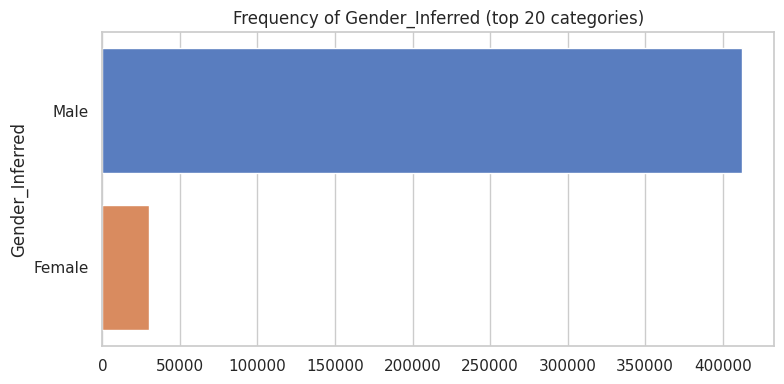

[2025-06-17 09:22:07,497] INFO - Univariate analysis completed.
INFO:preprocessing.eda:Univariate analysis completed.


In [118]:
eda.univariate_analysis()

# Multivariate Analysis

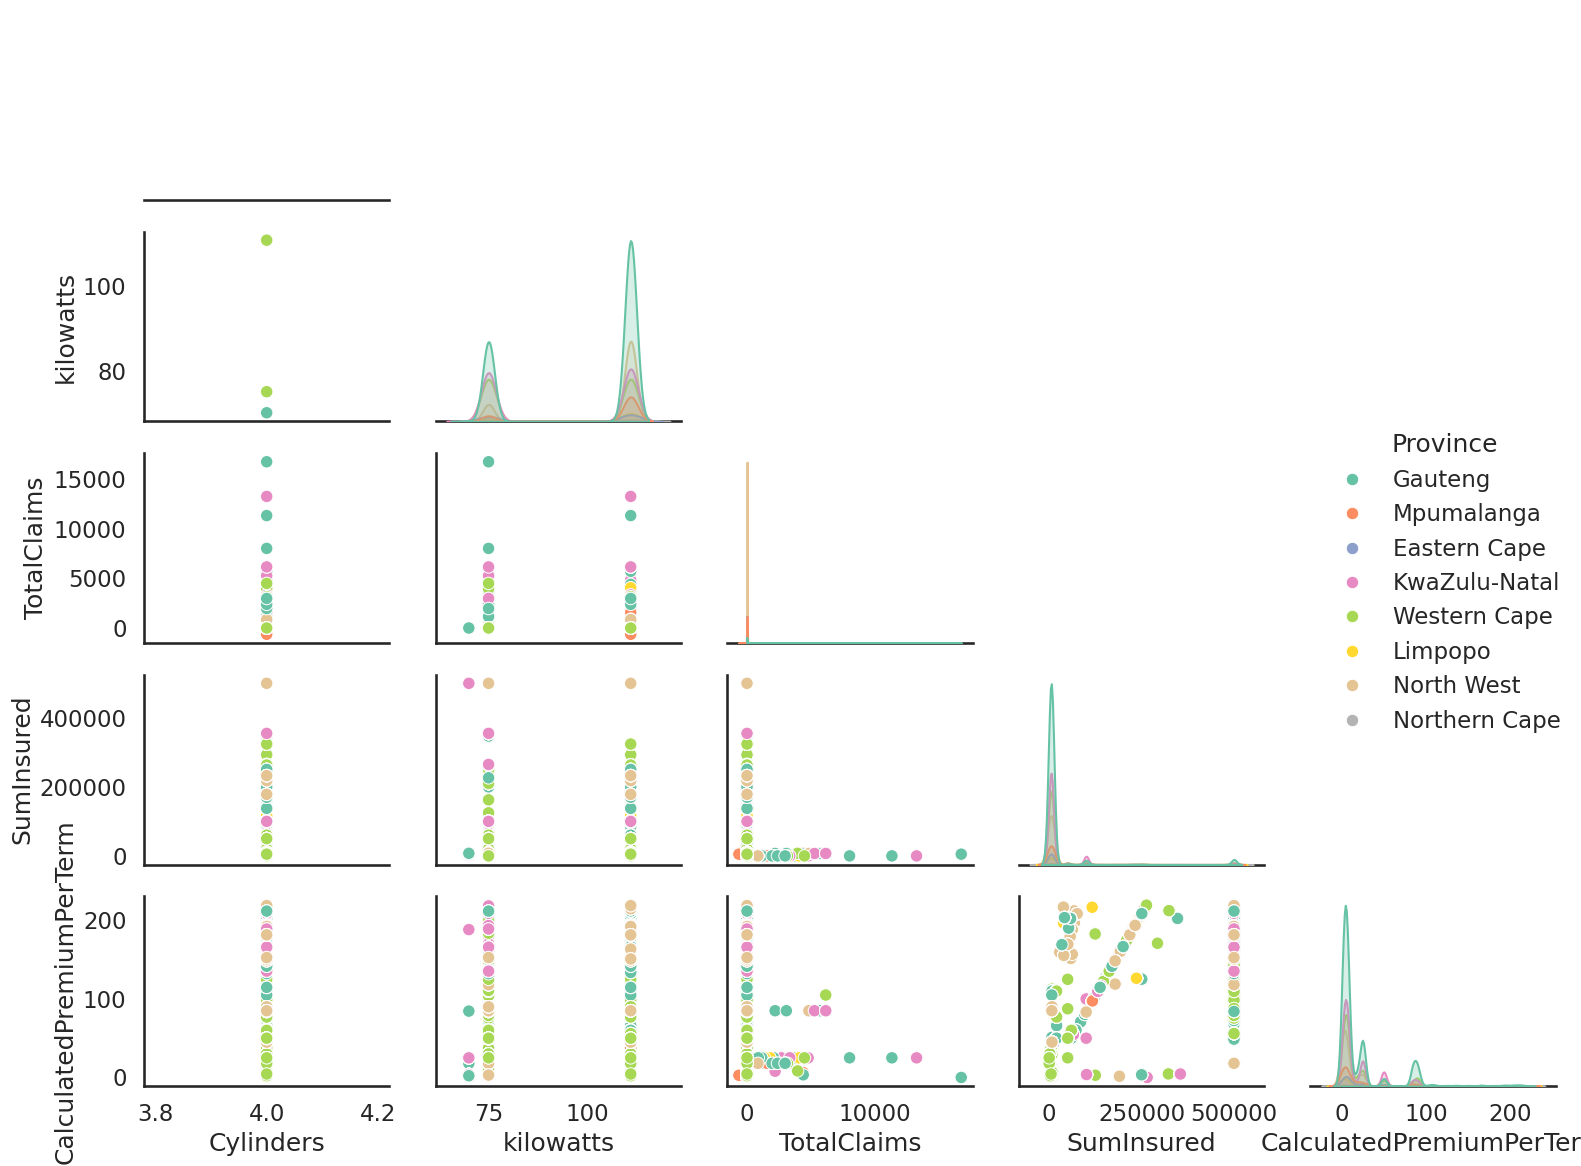

In [119]:
mva = MultivariateAnalysis(df)

# Pair plot
mva.pairplot(features=['Cylinders','kilowatts','TotalClaims','SumInsured','CalculatedPremiumPerTerm'], hue="Province")

In [73]:
# Heatmap
mva.correlation_heatmap(features=[
       'RegistrationYear', 'Cylinders', 'kilowatts',
       'NumberOfDoors', 'SumInsured',
       'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'])

NameError: name 'mva' is not defined

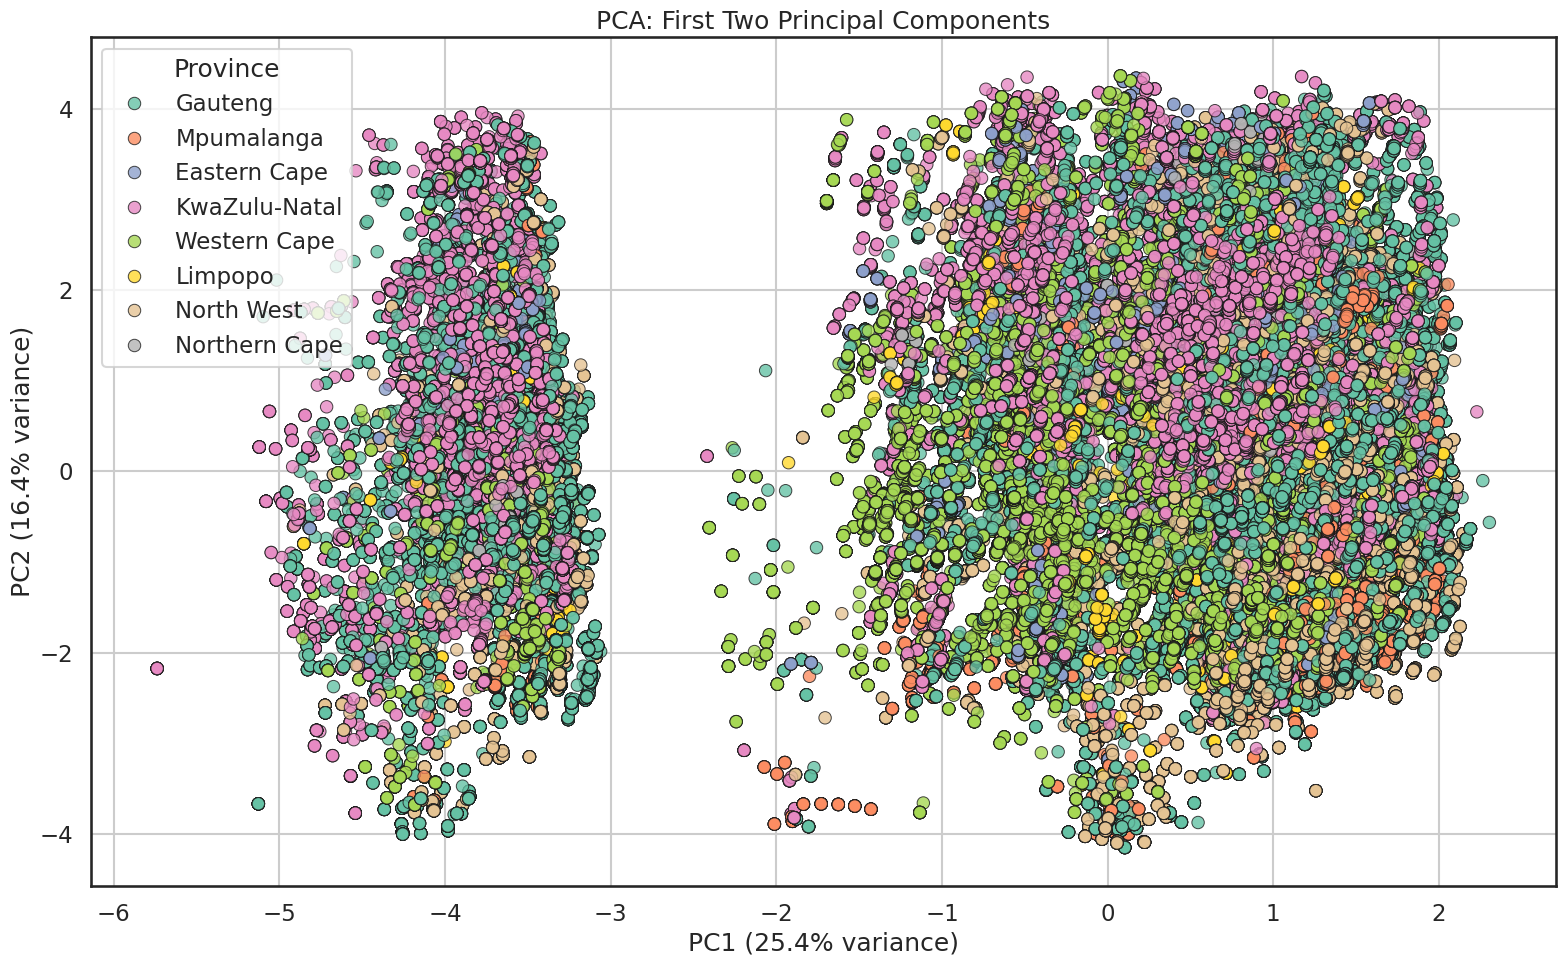

In [121]:

# PCA with optional scaling and color-coded by "Province"
mva.pca_analysis(hue="Province")